## **NAME : DANIA B SAM**

## **REG NO: RA2111027010071**

## **SEC: AB1**

**1.import the libraries and dataset**

In [297]:
import pandas as pd
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from nltk.tokenize import WhitespaceTokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix



In [298]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [299]:
df.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

**2.preprocess the data**

In [300]:
ndf = df[['v1','v2']]
ndf.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [301]:
ndf

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [302]:
ndf.isnull().sum()


v1    0
v2    0
dtype: int64

In [303]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

*lowercasing*

In [304]:
#lowercasing
ndf['v2']= ndf['v2'].apply(lambda x: x.lower())
ndf

<ipython-input-304-733a0730476d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['v2']= ndf['v2'].apply(lambda x: x.lower())


,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


*remove punctuation*

In [305]:
#remove punctuation
print(string.punctuation)

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
ndf['v2']= ndf['v2'].apply(lambda x:remove_punctuation(x))
ndf

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


<ipython-input-305-096a51342718>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['v2']= ndf['v2'].apply(lambda x:remove_punctuation(x))


,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


*remove stopwords*

In [306]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [307]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [308]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [309]:
#defining function for tokenization
import re
#whitespace tokenizer
from nltk.tokenize import WhitespaceTokenizer
def tokenization(text):
    tk = WhitespaceTokenizer()
    return tk.tokenize(text)

ndf['tokenised_clean_msg'] = ndf['v2'].apply(lambda x: tokenization(x))
print(ndf[['v2', 'tokenised_clean_msg']].head())



<ipython-input-309-4bf570de1f0c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['tokenised_clean_msg'] = ndf['v2'].apply(lambda x: tokenization(x))


                                                  v2  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in 2 a wkly comp to win fa cup fina...   
3        u dun say so early hor u c already then say   
4  nah i dont think he goes to usf he lives aroun...   

                                 tokenised_clean_msg  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, dont, think, he, goes, to, usf, he, l...  


In [310]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')


def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

ndf['cleaned_tokens']= ndf['tokenised_clean_msg'].apply(lambda x:remove_stopwords(x))
ndf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-310-ae23ff6a3bbb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['cleaned_tokens']= ndf['tokenised_clean_msg'].apply(lambda x:remove_stopwords(x))


,v1,v2,tokenised_clean_msg,cleaned_tokens
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,ham,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,ham,pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
5570,ham,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


*stemming*

In [311]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
ndf['cleaned_tokens']=ndf['cleaned_tokens'].apply(lambda x: stemming(x))
ndf

<ipython-input-311-3a1dbc562e66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['cleaned_tokens']=ndf['cleaned_tokens'].apply(lambda x: stemming(x))


,v1,v2,tokenised_clean_msg,cleaned_tokens
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goe, usf, live, around, tho..."
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tri, 2, contact, u, u, å£750, poun..."
5568,ham,will ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]"
5569,ham,pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[piti, mood, soani, suggest]"
5570,ham,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitch, act, like, id, interest, buy, som..."


**3.Apply label encoding for string attributes**

In [312]:
df['res'] = df.v1.map({'ham':0, 'spam':1})
df = df[['v1', 'v2', 'res']]
df.head()

,v1,v2,res
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='v1'>

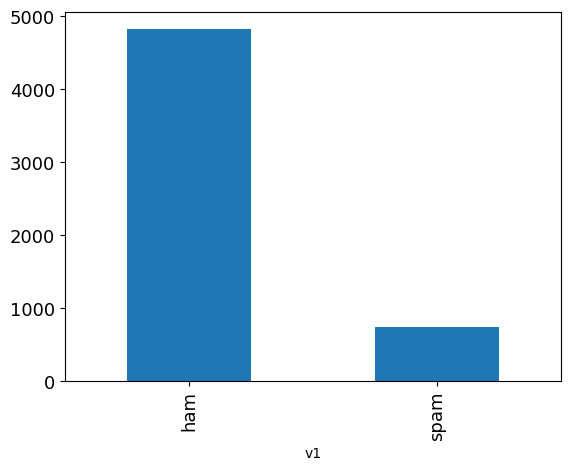

In [313]:
df.groupby(['v1'])['res'].count().plot(kind='bar', fontsize='13')

**5.Plot wordclouds for both ham and spam**

In [314]:
pip install stop-words


In [315]:
from stop_words import get_stop_words
def tokenz(x):
    spams = ' '.join(x).lower()
    spams = re.sub('[^a-z]+', ' ', spams)
    spams = nltk.word_tokenize(spams)
    spams = [i for i in spams if len(i) > 1]

    stop_words = list(get_stop_words('en'))
    spams_tokenize = [word for word in spams if word not in stop_words]
    spams_tokenize = ' '.join(spams_tokenize)
    return spams_tokenize

spam_words = tokenz(df[df.v1 == 'spam'].v2)
ham_words = tokenz(df[df.v1 == 'ham'].v2)

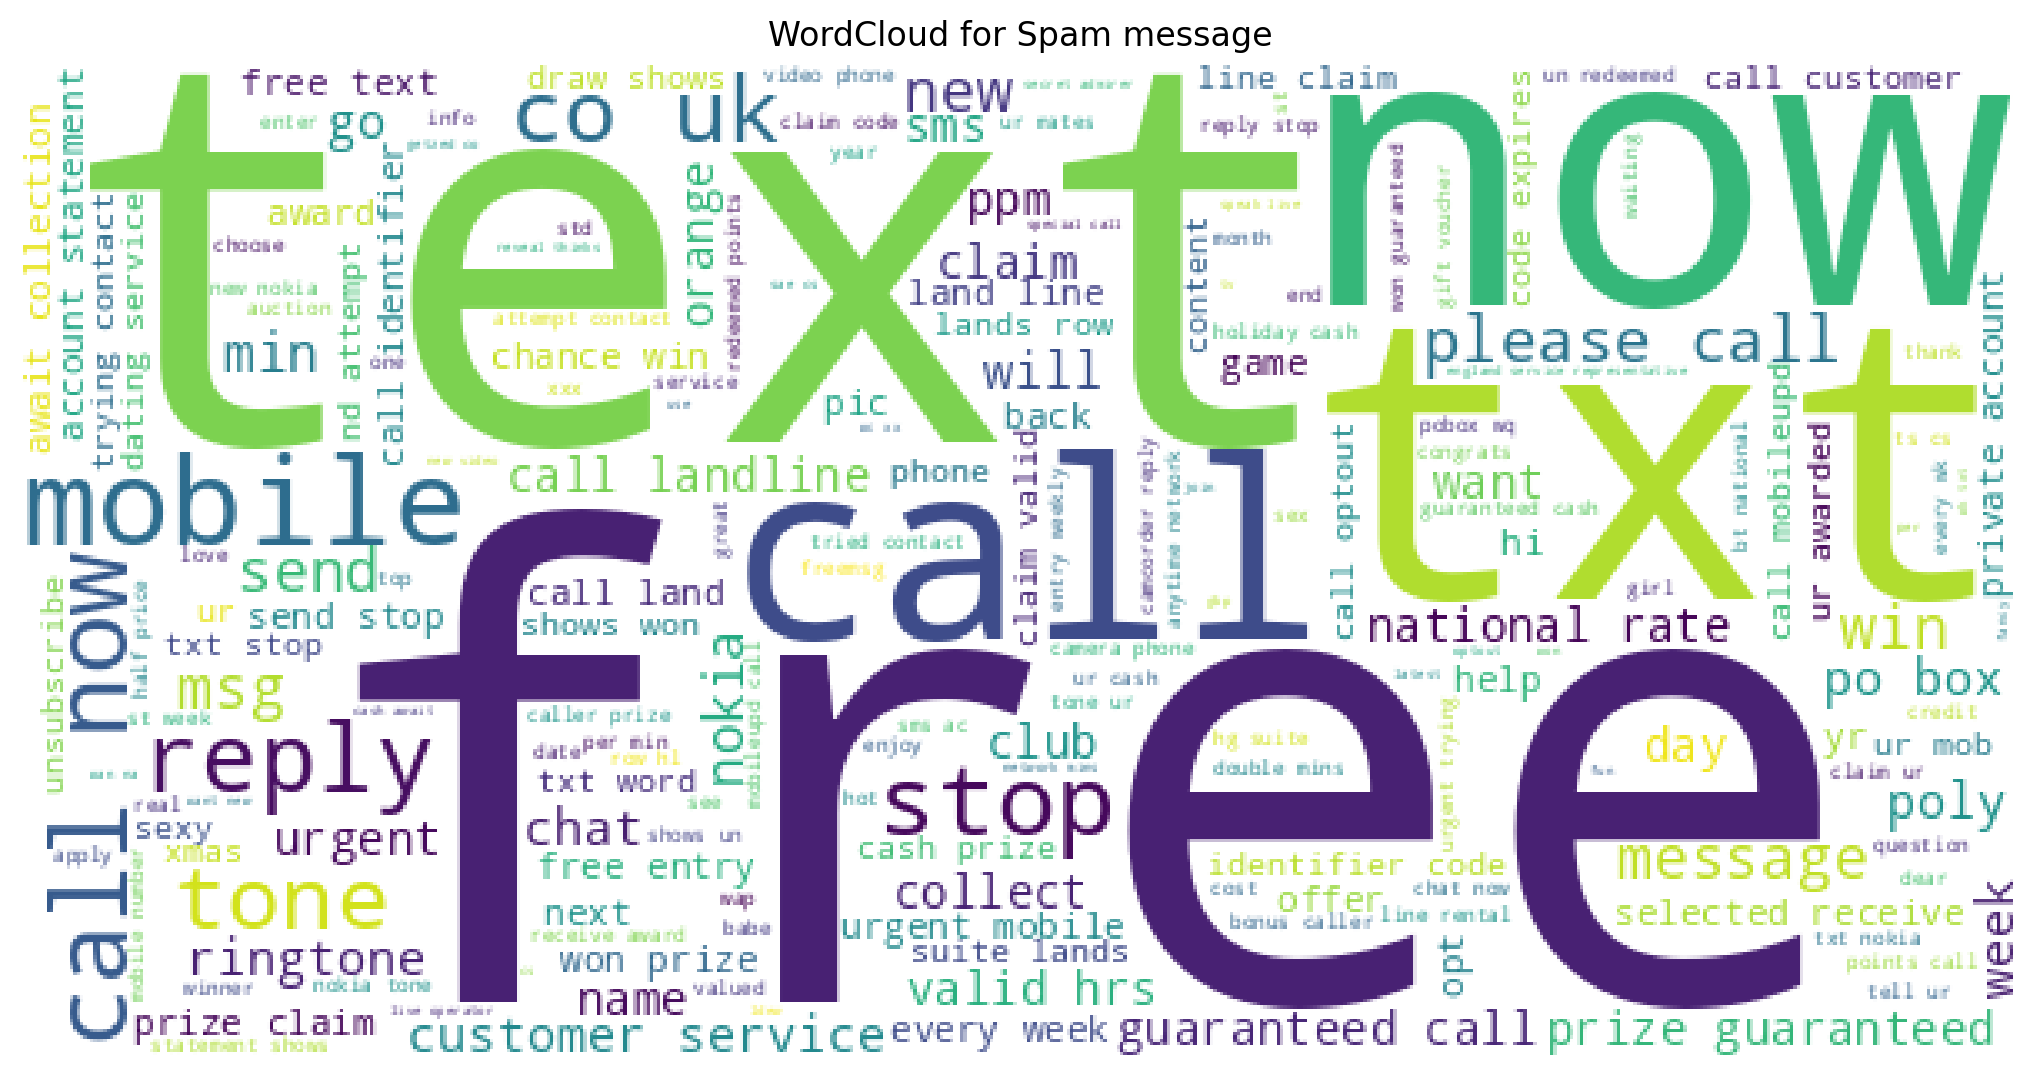

In [316]:
wc = WordCloud(width=600,height=300,background_color='white')

cld = wc.generate(spam_words)
plt.figure(figsize=(10,5), dpi=200)
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WordCloud for Spam message')
plt.show()

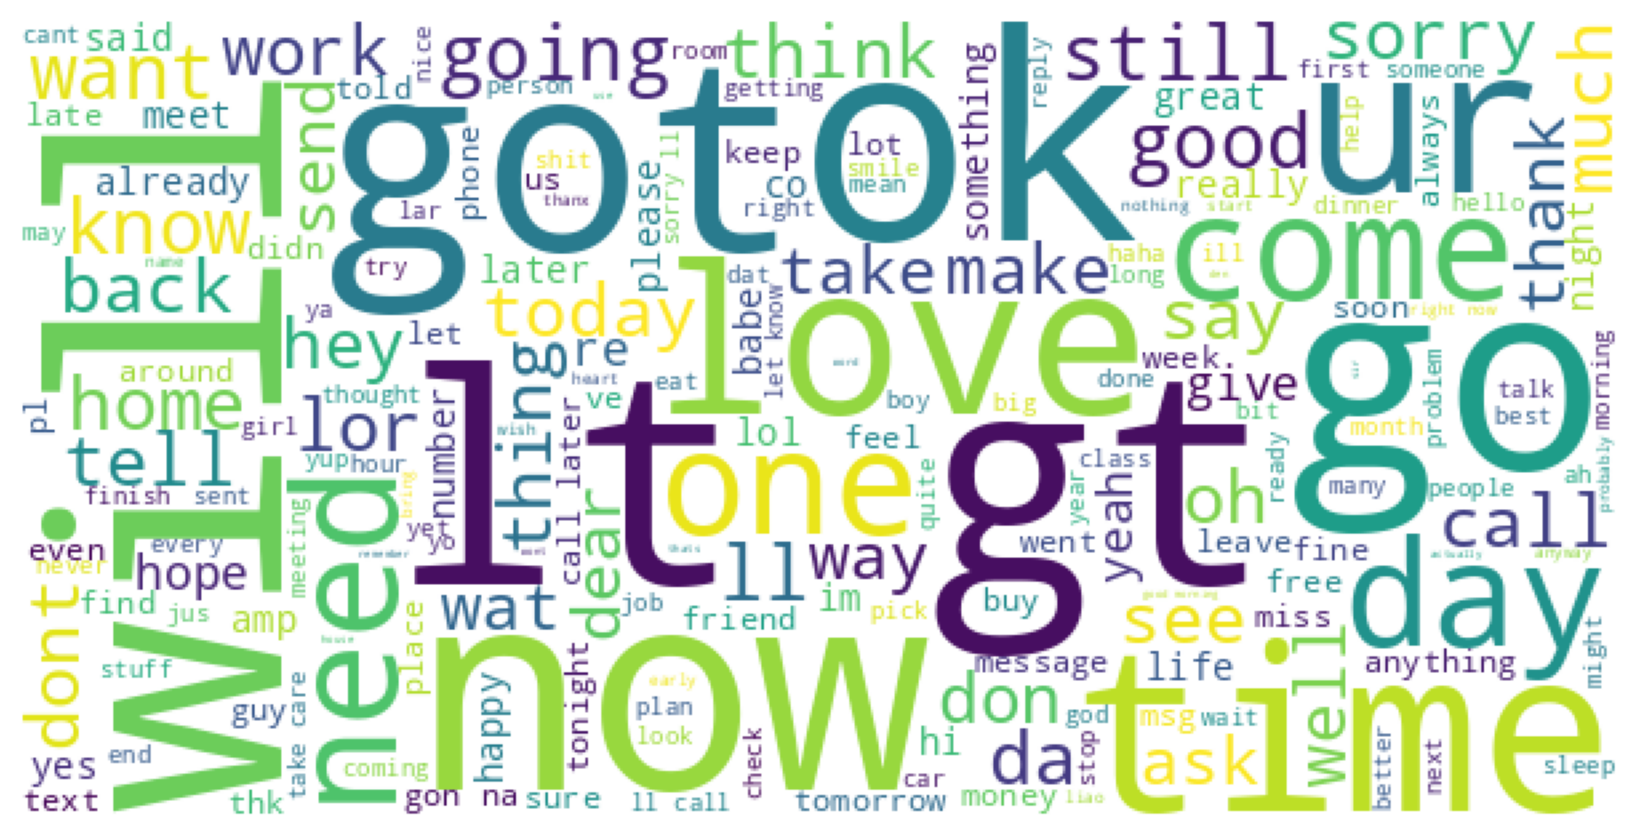

In [317]:
cld = wc.generate(ham_words)

plt.figure(figsize=(8,4), dpi=200)
plt.imshow(cld)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [318]:
ndf['v1'] = ndf.v1.map({'ham':0, 'spam':1})
ndf.head()

<ipython-input-318-3686b751a62f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['v1'] = ndf.v1.map({'ham':0, 'spam':1})


,v1,v2,tokenised_clean_msg,cleaned_tokens
0,0,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goe, usf, live, around, tho..."


**4.Divide the training and test set**

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ndf['v2'],
                                                    ndf['v1'],
                                                    test_size =0.2,
                                                    random_state=1)


print('Number of rows in the total set: {}'.format(ndf.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4457
Number of rows in the test set: 1115


**6.Calculate Term Frequency and Inverse document frequency**

In [320]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [321]:
training_data = count_vector.fit_transform(X_train).toarray()
testing_data = count_vector.transform(X_test).toarray()

In [322]:
frequency_matrix = pd.DataFrame(training_data,
                                columns = count_vector.get_feature_names_out())
frequency_matrix.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,02070836089,02072069400,...,åômorrow,åôrents,ìll,ìï,ìïll,ûthanks,ûªve,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
feature_names = tfidf_vectorizer.get_feature_names_out()
#Calculate Term Frequency
tf = tfidf_train[document_index].toarray()[0]
term_frequency = dict(zip(feature_names, tf))

# Calculate Inverse Document Frequency (IDF)
term_to_check = 'word'
term_index = np.where(feature_names == term_to_check)[0][0]
idf = tfidf_vectorizer.idf_[term_index]

# Calculate TF-IDF
tfidf_score = tfidf_test[document_index, term_index]

print("Term Frequency (TF) for document {}:".format(document_index))
print(term_frequency)

print("\nInverse Document Frequency (IDF) for term '{}':".format(term_to_check))
print(idf)

print("\nTF-IDF for document {} and term '{}':".format(document_index, term_to_check))
print(tfidf_score)




Term Frequency (TF) for document 0:
{'008704050406': 0.0, '0089my': 0.0, '0121': 0.0, '01223585236': 0.0, '01223585334': 0.0, '0125698789': 0.0, '02': 0.0, '020603': 0.0, '02070836089': 0.0, '02072069400': 0.0, '02073162414': 0.0, '02085076972': 0.0, '020903': 0.0, '021': 0.0, '050703': 0.0, '0578': 0.0, '06': 0.0, '061104': 0.0, '07008009200': 0.0, '07046744435': 0.0, '07090201529': 0.0, '07090298926': 0.0, '07099833605': 0.0, '071104': 0.0, '07123456789': 0.0, '0721072': 0.0, '07732584351': 0.0, '07734396839': 0.0, '07742676969': 0.0, '0776xxxxxxx': 0.0, '07786200117': 0.0, '077xxx': 0.0, '078': 0.0, '07801543489': 0.0, '07808247860': 0.0, '07808726822': 0.0, '07815296484': 0.0, '07821230901': 0.0, '0789xxxxxxx': 0.0, '0794674629107880867867': 0.0, '0796xxxxxx': 0.0, '07973788240': 0.0, '07xxxxxxxxx': 0.0, '0800': 0.0, '08000407165': 0.0, '08000776320': 0.0, '08000839402': 0.0, '08000930705': 0.0, '08000938767': 0.0, '08001950382': 0.0, '08002888812': 0.0, '08002986030': 0.0, '080029

**8.Apply logistic regression**

In [324]:
testing_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [325]:
clf = LogisticRegression(random_state=0).fit(training_data, y_train)

In [326]:
predictions = clf.predict(testing_data)

In [327]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

**9. Compute Accuracy, Confusion matrix and F1 score**

In [328]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, predictions))

Accuracy score:  0.9856502242152466
F1 score:  0.9402985074626865

Confusion Matrix :
 [[973   3]
 [ 13 126]]


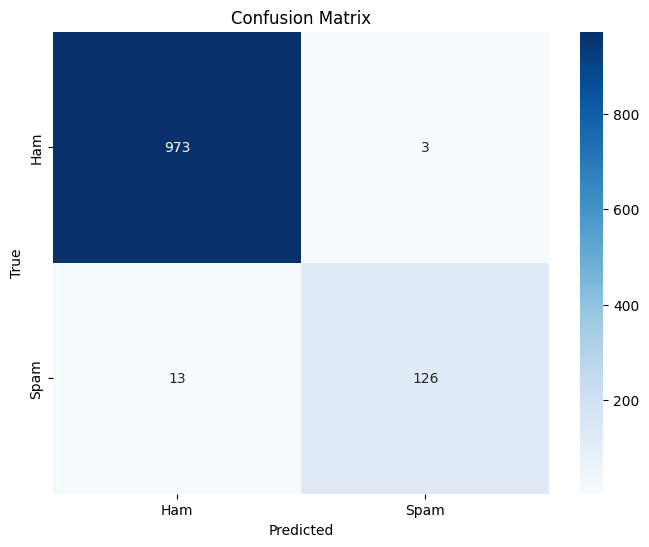

In [329]:
import seaborn as sns
confusion = confusion_matrix(y_test, predictions)
# confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**10.Define the ham and spam features and define the spam messages in test set**

In [330]:
X_test_ham = X_test[y_test == 0]  # Ham messages
X_test_spam = X_test[y_test == 1]  # Spam messages

# Print the first few ham messages
print("Ham Messages in Test Set:")
print(X_test_ham.head())

# Print the first few spam messages
print("\nSpam Messages in Test Set:")
print(X_test_spam.head())

Ham Messages in Test Set:
1078                             convey my regards to him
4028                  û anyway many good evenings to u s
958     my sort code is  and acc no is  the bank is na...
4642                           sorry i din lock my keypad
5461    ok i thk i got it then u wan me 2 come now or wat
Name: v2, dtype: object

Spam Messages in Test Set:
4674    hi babe its chloe how r u i was smashed on sat...
2582    3 free tarot texts find out about your love li...
1929    free 1st week entry 2 textpod 4 a chance 2 win...
5189    ree entry in 2 a weekly comp for a chance to w...
1573    sms auction  a brand new nokia 7250 is up 4 au...
Name: v2, dtype: object
